This is a file for combining four different catalogs (ROSAT, NVSS, WISE, 2MASS) to get a main catalog that we can use to apply more cut in order to find more candiates for galaxy cluster with AGN at the center.

There are also a part for looking at the image and making a cut (``02_find_object.ipynb``) and making plots (``03_plotting 560 candidates.ipynb``)
## File I use

* rosat.txt (after delete some columns)
* nvss_ff.txt (after delete line with N, delete blank lines, delete column afterward)
* sumss_f.txt (after delete come columns)

### Specification for Each Survey

* Rosat http://arxiv.org/pdf/astro-ph/0109542.pdf
    * psf: total maximum 10 arcsecond
    * catalog name: http://www.xray.mpe.mpg.de/rosat/survey/rass-bsc/main/rass-bsc1-fmt.html
* NVSS: http://www.cv.nrao.edu/nvss/NVSShelp.html#general

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import csv
from matplotlib import cm
import sys
%matplotlib inline
pylab.rcParams['figure.figsize'] = 8, 5

import matplotlib
from astropy.io import ascii
import mpld3
from mpld3 import plugins, utils
#mpld3.enable_notebook()
#mpld3.disable_notebook()

In [2]:
#function to remove all non-numbers characters into Nan
def func(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

In [3]:
def deg_hr(x, y):
    h=np.floor(x/15.)
    m=np.floor((x-(h*15.))*4.)
    s=(x-h*15.-m/4.)*240

    z=abs(y)
    deg=np.floor(z)
    arcm=np.floor((z-deg)*60.)
    arcs=(z-deg-arcm/60.)*3600.
    
    if y < 0:
        sign='-'
    else:
        sign='+'
    return "%ih%im%.2fs %s%id%im%.2fs" % (h,m,s,sign,deg,arcm,arcs)
    

## NVSS Catalog 
 * reading file

In [4]:
dc=[]
with open('/Users/taweewat/Documents/xray_project/radio/nvss_cut.txt') as f:
    content = f.readlines()

for i in content:
    cont=i.rstrip('\n')
    h=func(cont[0:2])
    m=func(cont[3:5])
    s=func(cont[6:11])
    deg=func(cont[12:15])
    arcmin=func(cont[16:18])
    arcsec=func(cont[19:23])
    x=func(cont[24:29])
    flux=func(cont[29:36])
    co=[h,m,s,deg,arcmin,arcsec,x,flux]
    
    if not np.isnan(co[0]):
        con=co
    else:
        con.append(co[7])
        dc.append(con)
            
def func(x):
    try:
        return float(x)
    except ValueError:
        return np.nan
    

In [5]:
headers=["ra_h" , "ra_m" , "ra_s" , "dec_deg" , "dec_arcm" , "dec_arcs" , "dist" , "flux", "dflux"]
dc_df = pd.DataFrame(dc, columns=headers)

In [7]:
dc_df[dc_df['flux']>20000.]

,ra_h,ra_m,ra_s,dec_deg,dec_arcm,dec_arcs,dist,flux,dflux
244503,3,19,48.16,41,30,42.1,99999,22829.2,684.9
339977,4,37,4.57,29,40,14.2,99999,49728.5,1684.1
410813,5,34,28.03,22,2,2.5,99999,324323.0,9782.9
410827,5,34,28.38,22,0,18.4,99999,141414.0,4287.2
410853,5,34,29.70,22,0,1.8,99999,118369.0,3595.9
410995,5,34,35.80,22,0,36.8,99999,271633.0,8193.5
411899,5,35,17.18,-5,22,43.1,99999,113563.0,3425.5
411923,5,35,18.19,-5,24,28.4,99999,72733.1,2198.2
420903,5,42,36.15,49,51,7.7,99999,22879.6,686.4
686329,9,18,5.78,-12,5,41.3,99999,40849.9,1278.8


RA in degrees = Hours x 15 + minutes/4 + seconds/240

In [8]:
df3=dc_df
df3.columns

Index([u'ra_h', u'ra_m', u'ra_s', u'dec_deg', u'dec_arcm', u'dec_arcs',
       u'dist', u'flux', u'dflux'],
      dtype='object')

In [15]:
print df3.shape#, df.shape, df2.shape

(1763161, 9)


(3536648, 8) (2007121, 8) (1773474, 10)

In [9]:
%time df3.loc[:,'ra'] = df3.loc[:,'ra_h']*15.0+df3.loc[:,'ra_m']/4.0+df3.loc[:,'ra_s']/240.0

%time c1 = df3.loc[:,'dec_deg'].map(lambda x: x >= 0.0)
%time c2 = df3.loc[:,'dec_deg'].map(lambda x: x < 0.0)

%time df3.loc[c1,'dec'] = df3.loc[c1,'dec_deg']+df3.loc[c1,'dec_arcm']/60.0+df3.loc[c1,'dec_arcs']/3600.0
%time df3.loc[c2,'dec'] = df3.loc[c2,'dec_deg']-df3.loc[c2,'dec_arcm']/60.0-df3.loc[c2,'dec_arcs']/3600.0

CPU times: user 188 ms, sys: 113 ms, total: 302 ms
Wall time: 221 ms
CPU times: user 582 ms, sys: 17.2 ms, total: 599 ms
Wall time: 599 ms
CPU times: user 587 ms, sys: 14.1 ms, total: 601 ms
Wall time: 601 ms
CPU times: user 285 ms, sys: 195 ms, total: 480 ms
Wall time: 448 ms
CPU times: user 76.9 ms, sys: 25.9 ms, total: 103 ms
Wall time: 85.3 ms


## ROSAT Catalog

In [10]:
#data_df = pd.read_csv('/Users/taweewat/Documents/xray_project/rosat/rosat.txt')

#for faint object
headers=['ra','dec','xc','exc','hr1','ehr1','hr2','ehr2']
data_df = pd.read_csv('/Users/taweewat/Documents/xray_project/rosat/rosat_faint.txt', names=headers)

headers=['ra','dec','xc','exc','hr1','ehr1','hr2','ehr2']
data_df2 = pd.read_csv('/Users/taweewat/Documents/xray_project/rosat/rosat.txt', names=headers)

rosat=data_df.append(data_df2).reset_index(drop=True)
data_df.shape, data_df2.shape, rosat.shape

((105924, 8), (18806, 8), (124730, 8))

In [11]:
rad=20.0*0.000277777778 #10 arcsec in deg

def find_ra(x):
    ra=x[0]
    ra_up=ra+rad
    ra_down=ra-rad
    
    dec=x[1]
    dec_up=dec+rad
    dec_down=dec-rad
    
    result=df3[df3['ra'].between(ra_down, ra_up) & df3['dec'].between(dec_down,dec_up)]
    
    if len(result) == 0:
        return pd.Series({'ra_radio': np.nan,'dec_radio': np.nan,'f_radio': np.nan,'df_radio': np.nan})
    else:
        result.loc[:,'dist']=((result.loc[:,'ra']-ra)**2+(result.loc[:,'dec']-dec)**2)**0.5
        mini=result.ix[result['dist'].idxmin()]
        if mini['dist'] <= rad:
            return pd.Series({'ra_radio': float(mini['ra']),\
                              'dec_radio': float(mini['dec']),\
                              'f_radio': float(mini['flux']),\
                              'df_radio': float(mini['dflux'])})            
    
        #if len(result) == 1:
        #    return pd.Series({'ra_radio': float(result['ra']),'dec_radio': float(result['dec']),\
        #                      'f_radio': float(result['flux']),'df_radio': float(result['dflux'])})

        #else:
        #    print 'multiple'
        #    x=result
        #    x.loc[:,'dist']=((x.loc[:,'ra']-ra)**2+(x.loc[:,'dec']-dec)**2)**0.5
        #    mini=x.ix[x['dist'].idxmin()]
        #    return pd.Series({'ra_radio': float(mini['ra']),\
        #                      'dec_radio': float(mini['dec']),\
        #                      'f_radio': float(mini['flux']),\
        #                      'df_radio': float(mini['dflux'])})

#newrosat=rosat.apply(find_ra, axis=1)
%time newrosat=rosat[0:2000].apply(find_ra, axis=1)

CPU times: user 28.5 s, sys: 131 ms, total: 28.7 s
Wall time: 28.7 s


/Users/taweewat/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:508: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [12]:
nv=rosat.join(newrosat).dropna()
%time nv['dis']=((nv['ra'].values-nv['ra_radio'].values)**2+(nv['dec'].values-nv['dec_radio'].values)**2)**0.5

nv['dis'].values*3600

CPU times: user 444 ms, sys: 638 µs, total: 445 ms
Wall time: 445 ms


array([ 13.29642659,  10.46292445,   3.52463842,  16.74317437,
        18.58729641,  17.97680283,  13.46403803,  19.35017034,
         9.05366224,   8.94853284,   7.28752578,  10.51635374,
        15.37635067,   6.16451296,  19.39507907,   6.4968891 ,
        18.4981664 ,  14.63020178,  17.30089477,   5.67749698,  19.77159336])

performane: 17s, 19.4s (new) 22, 23, 19, (newnew) 100: 6(0)| 300: 85(2) |1000: 220(7)

In [13]:
#combine a new table with the ROSAT table
rosat2=rosat.join(newrosat)
#drop Nan lines to only see the matched result
rosat3=rosat2.dropna()

In [31]:
nrosat.to_csv('/Users/taweewat/Documents/xray_project/result/rosat-nvss2.csv', index=False)

In [19]:
newfile = pd.read_csv('/Users/taweewat/Documents/xray_project/result/rosat-nvss2.csv',\
                    keep_default_na=False, na_values=[""])

In [21]:
newfile.dropna()

,dec_radio,df_radio,f_radio,ra_radio
112,84.333444,1.8,57.1,33.254125
180,84.823194,1.2,36.3,65.187000
214,82.467472,3.2,90.6,46.956708
259,84.293861,3.5,116.9,96.582792
274,83.475139,1.1,24.0,77.854042
305,81.692917,0.5,6.8,88.212625
479,85.131000,0.5,3.2,195.477833
484,84.780361,1.3,17.2,195.911000
486,84.605028,9.3,279.7,185.851208
610,82.889667,1.4,23.2,248.847417


## SUMSS Catalog

In [14]:
#header_row=['ra_h','ra_m','ra_s','dec_deg', 'dec_arcm', 'dec_arcs','peak','dpeak','f','ef']
#su0 = pd.read_csv('/Users/taweewat/Documents/xray_project/radio/sumss_f.txt', names=header_row)
header_row=['ra_h','ra_m','ra_s','dec_deg', 'dec_arcm', 'dec_arcs','peak','dpeak','f0','ef0','f','ef']
su0 = pd.read_csv('/Users/taweewat/Documents/xray_project/radio/sumss_ff.txt', names=header_row)

In [15]:
su0['ra'] = su0.loc[:,'ra_h']*15.0+su0.loc[:,'ra_m']/4.0+su0.loc[:,'ra_s']/240.0
su0['dec'] = su0.loc[:,'dec_deg']-su0.loc[:,'dec_arcm']/60.0-su0.loc[:,'dec_arcs']/3600.0

In [16]:
su0.shape#[110:115]

(211050, 14)

In [17]:
criterion = su0['dec_deg'].map(lambda x: x > 0.0)
su0.loc[criterion,'dec_deg']

Series([], Name: dec_deg, dtype: int64)

In [20]:
rosat[0:10]

,ra,dec,xc,exc,hr1,ehr1,hr2,ehr2
0,169.16417,87.20055,0.016470,0.005433,1.00,0.55,0.31,0.32
1,168.12584,87.43764,0.011780,0.004613,-0.31,0.37,-1.00,1.02
2,215.27333,87.19417,0.009450,0.004970,1.00,0.54,0.82,0.42
3,216.42958,87.20597,0.015550,0.004870,1.00,0.24,0.26,0.29
4,148.65500,87.47236,0.021900,0.006527,0.54,0.29,-0.17,0.33
5,220.58667,87.24194,0.019270,0.005577,0.48,0.30,0.47,0.29
6,174.94583,87.92292,0.007855,0.003960,0.00,0.48,-1.00,0.73
7,206.36833,87.74319,0.009525,0.004093,0.58,0.52,0.16,0.44
8,189.42708,87.96764,0.021790,0.006313,-0.14,0.27,-0.47,0.33
9,147.03708,87.65931,0.012270,0.004824,0.43,0.39,-0.18,0.43


In [28]:
#older version, square radius and no uncertainty for flux
rad=30.0*0.000277777778 #10 arcsec in deg

def find_su(x):
    ra=x['ra']
    ra_up=ra+rad
    ra_down=ra-rad
    
    dec=x['dec']
    dec_up=dec+rad
    dec_down=dec-rad
    
    result=su0[su0['ra'].between(ra_down, ra_up) & su0['dec'].between(dec_down,dec_up)]
    
    #if len(result) == 1:
    #    return pd.Series({'ra_radio': float(result.loc[:,'ra']),'dec_radio': float(result.loc[:,'dec']),\
    #                      'f_radio': float(result.loc[:,'f'])})
    #elif len(result) == 0:
    #    return pd.Series({'ra_radio': np.nan,'dec_radio': np.nan,'f_radio': np.nan})
    #else:
        #return pd.Series({'ra_radio': np.nan,'dec_radio': np.nan,'f_radio': np.nan})
    #    print 'multiple'
    #    x=result
    #    x.loc[:,'dist']=((x.loc[:,'ra']-ra)**2+(x.loc[:,'dec']-dec)**2)**0.5
    #    mini=x['dist'].idxmin()
    #    return pd.Series({'ra_radio': float(x['ra'].ix[mini]),\
    #                      'dec_radio': float(x['dec'].ix[mini]),\
    #                      'f_radio': float(x['f'].ix[mini])})
    
    if len(result) == 0:
        return pd.Series({'ra_radio': np.nan,'dec_radio': np.nan,'f_radio': np.nan,'df_radio': np.nan})
    elif len(result) == 1:
        return pd.Series({'ra_radio': float(result['ra']),'dec_radio': float(result['dec']),\
                          'f_radio': float(result['f']),'df_radio': float(result['ef'])})
    else:
        result.loc[:,'dist']=((result.loc[:,'ra']-ra)**2+(result.loc[:,'dec']-dec)**2)**0.5
        mini=result.ix[result['dist'].idxmin()]
        return pd.Series({'ra_radio': float(mini['ra']),\
                          'dec_radio': float(mini['dec']),\
                          'f_radio': float(mini['f']),\
                          'df_radio': float(mini['ef'])})

%time t=rosat.apply(find_su, axis=1)

/Users/taweewat/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/taweewat/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


CPU times: user 4min 47s, sys: 3.35 s, total: 4min 51s
Wall time: 4min 51s


In [127]:
rad=20.0*0.000277777778 #10 arcsec in deg

def find_su(x):
    ra=x['ra']
    ra_up=ra+rad
    ra_down=ra-rad
    
    dec=x['dec']
    dec_up=dec+rad
    dec_down=dec-rad
    
    result=su0[su0['ra'].between(ra_down, ra_up) & su0['dec'].between(dec_down,dec_up)]
    
    if len(result) == 0:
        return 
    else:
        result.loc[:,'dist']=((result.loc[:,'ra']-ra)**2+(result.loc[:,'dec']-dec)**2)**0.5
        mini=result.ix[result['dist'].idxmin()]
        if mini['dist'] <= rad:
            return pd.Series({'ra_radio': float(mini['ra']),\
                              'dec_radio': float(mini['dec']),\
                              'f_radio': float(mini['f']),\
                              'df_radio': float(mini['ef'])})            
    
%time test=rosat[0:10000].apply(find_su, axis=1)

CPU times: user 1min 17s, sys: 497 ms, total: 1min 18s
Wall time: 1min 18s


In [50]:
t.to_csv('/Users/taweewat/Documents/xray_project/result/t.csv', index=False)
nf = pd.read_csv('/Users/taweewat/Documents/xray_project/result/t.csv',\
                    keep_default_na=False, na_values=[""])
nf.dropna()

,dec_radio,df_radio,f_radio,ra_radio,f_radio_n
77365,-30.222667,3.4,31.9,14.026375,16.496814
77471,-29.891694,6.5,42.1,24.569750,21.771658
77472,-29.940389,3.0,73.7,21.187625,38.113329
77685,-30.435028,8.1,251.9,36.919250,130.267947
77768,-30.808750,1.8,11.0,39.688083,5.688557
77815,-30.402417,3.5,92.5,48.228208,47.835590
77925,-30.817417,1.6,27.8,60.224375,14.376534
77998,-30.174000,5.2,160.1,64.945667,82.794356
78161,-30.127333,53.1,1578.8,74.596542,816.463019
78171,-30.794056,12.6,415.8,75.278542,215.027441


## Combining Rosat, NVSS, SUMSS

In [137]:
newfile
#newrosat=newfile.loc[:,('dec_radio','df_radio','f_radio','ra_radio')]
#newrosat

,ra,dec,xc,exc,hr1,ehr1,hr2,ehr2,dec_radio,f_radio,ra_radio
0,0.00000,-39.48403,0.13080,0.03496,0.69,0.25,0.28,0.24,NaN,NaN,NaN
1,0.02917,8.28153,0.18690,0.02050,0.89,0.10,0.24,0.13,NaN,NaN,NaN
2,0.04167,-63.59528,0.19040,0.03125,-0.36,0.13,-0.35,0.23,NaN,NaN,NaN
3,0.04958,5.38833,0.26370,0.02586,0.24,0.10,0.00,0.13,NaN,NaN,NaN
4,0.05250,1.77250,0.08114,0.01612,0.05,0.20,0.00,0.26,NaN,NaN,NaN
5,0.05625,57.94125,0.11780,0.01730,0.57,0.12,0.32,0.14,NaN,NaN,NaN
6,0.08125,-26.17556,0.11780,0.02219,-0.26,0.17,0.19,0.29,NaN,NaN,NaN
7,0.14792,-28.09819,0.07202,0.01830,0.17,0.27,0.29,0.51,NaN,NaN,NaN
8,0.16000,79.67694,0.10070,0.01270,0.09,0.11,0.12,0.15,NaN,NaN,NaN
9,0.17708,62.17611,0.15920,0.01864,-0.03,0.11,-0.23,0.16,NaN,NaN,NaN


In [119]:
print (((nrosat.loc[:,'ra_radio']-210.25958)**2+(nrosat.loc[:,'dec_radio']-2.88)**2)**0.5)[(((nrosat.loc[:,'ra_radio']-210.25958)**2+(nrosat.loc[:,'dec_radio']-2.88)**2)**0.5).idxmin()]*3600.
print (((nrosat.loc[:,'ra_radio']-49.950416)**2+(nrosat.loc[:,'dec_radio']-41.51166)**2)**0.5)[(((nrosat.loc[:,'ra_radio']-49.950416)**2+(nrosat.loc[:,'dec_radio']-41.51166)**2)**0.5).idxmin()]*3600
print (((t.loc[:,'ra_radio']-356.17583)**2+(t.loc[:,'dec_radio']+42.71888)**2)**0.5)[(((t.loc[:,'ra_radio']-356.17583)**2+(t.loc[:,'dec_radio']+42.71888)**2)**0.5).idxmin()]*3600.88
print t.loc[(((t.loc[:,'ra_radio']-356.17583)**2+(t.loc[:,'dec_radio']+42.71888)**2)**0.5).idxmin(),:]

5413.44425802
18001.9075777
24.5703541521
dec_radio    -42.720500
df_radio       2.800000
f_radio       79.200000
ra_radio     356.182458
Name: 124544, dtype: float64


In [34]:
t.dropna().shape, rosat.shape, nrosat.dropna().shape

((1325, 4), (124730, 8), (8853, 4))

In [35]:
r=pd.concat([rosat, t], axis=1)
r.shape

(124730, 12)

In [36]:
%time r['dist']=((r['ra'].values-r['ra_radio'].values)**2+(r['dec'].values-r['dec_radio'].values)**2)**0.5

CPU times: user 2.15 ms, sys: 294 µs, total: 2.44 ms
Wall time: 2.02 ms


In [37]:
#Adding ratio to adjust the flux from SUMSS to equal to NVSS
alpha=-1.3
ratio=(1.4/0.843)**alpha
t['f_radio_n']=t['f_radio']*ratio

nrosat['f_radio_n']=nrosat['f_radio']

In [38]:
rosat_rad.loc[rosat_rad['flag']==2.0,("f_radio","f_radio_n")].dropna()

NameError: name 'rosat_rad' is not defined

In [55]:
rosat_nv=pd.concat([rosat, nrosat], axis=1)
rosat_su=pd.concat([rosat, t], axis=1)
rosat_nv['flag']=0.0

In [60]:
#flag 1 (NVSS) and 2 (SUMSS) for different catalogs
rosat_nv['flag'][np.isfinite(rosat_nv['f_radio_n'])]=1.0 #set nvss = 1 
rosat_su['flag']=np.nan

#combine SUMSS and NVSS result together
rosat_rad=rosat_su.fillna(rosat_nv)

rosat_rad['flag'][np.isnan(rosat_nv['f_radio_n'])]=2.0 #set sumss = 2
#rosat_r=rosat_rad.dropna()
rosat_rad[rosat_rad['flag']==2.0].dropna()

,ra,dec,xc,exc,hr1,ehr1,hr2,ehr2,dec_radio,df_radio,f_radio,ra_radio,f_radio_n,flag
77471,24.57542,-29.88542,0.01578,0.007410,0.17,0.44,-0.35,0.44,-29.891694,6.5,42.1,24.569750,21.771658,2
78161,74.59834,-30.12625,0.01663,0.006927,0.73,0.63,0.50,0.40,-30.127333,53.1,1578.8,74.596542,816.463019,2
78315,81.33750,-30.91111,0.03444,0.011670,1.00,0.48,0.68,0.29,-30.907611,3.1,75.1,81.345375,38.837328,2
81789,23.58042,-32.75056,0.05863,0.014030,0.79,0.40,1.00,0.38,-32.744722,1.4,12.1,23.574208,6.257412,2
81815,21.86083,-34.17139,0.02306,0.010500,-1.00,0.33,1.00,9.99,-34.166694,1.6,14.4,21.867750,7.446838,2
81867,27.05833,-31.93722,0.04138,0.011980,0.62,0.28,0.35,0.25,-31.931194,6.8,155.9,27.066375,80.622362,2
82611,86.75375,-34.25611,0.01241,0.005709,1.00,0.59,0.65,0.31,-34.252639,1.7,11.1,86.757375,5.740271,2
82947,109.23959,-36.36528,0.14880,0.024480,1.00,0.07,0.65,0.13,-36.373389,25.9,681.5,109.236458,352.431940,2
83107,139.86000,-31.36889,0.01640,0.006948,0.55,0.44,-0.85,1.43,-31.362111,3.6,26.6,139.862750,13.755964,2
85178,342.59042,-32.66570,0.03169,0.013830,1.00,0.41,0.69,0.62,-32.669333,1.9,11.5,342.588750,5.947127,2


In [57]:
%time rosat_rad['dist']=((rosat_rad['ra'].values-rosat_rad['ra_radio'].values)**2+\
                  (rosat_rad['dec'].values-rosat_rad['dec_radio'].values)**2)**0.5

CPU times: user 2 ms, sys: 304 µs, total: 2.31 ms
Wall time: 1.9 ms


In [58]:
#Cut down the size back to 20 arcsecond

#rosat_r=rosat_rad[rosat_rad['dist']<=20./3600.]
#rosat_rad.to_csv('/Users/taweewat/Documents/xray_project/result/rosat-rad-total.csv', index=False)
rosat_r=rosat_rad.dropna()
rosat_r.shape, rosat_rad.shape

((9784, 15), (124730, 15))

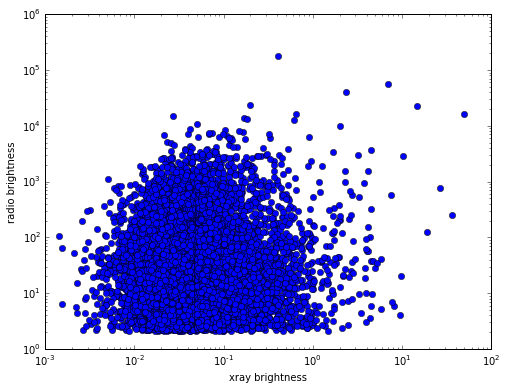

In [59]:
mpld3.disable_notebook()
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(rosat_r['xc'].values,rosat_r['f_radio_n'].values,'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('xray brightness')
ax.set_ylabel('radio brightness')

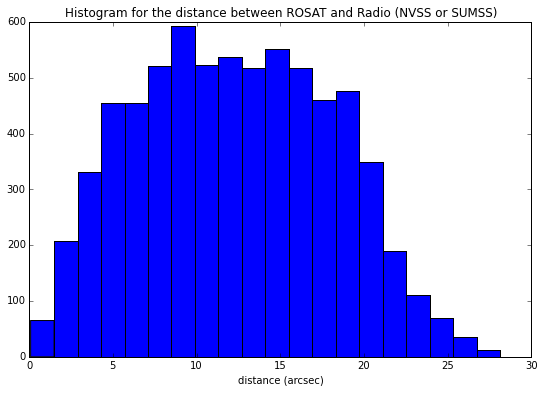

In [550]:
plt.hist(rosat_r['dist'].dropna().values*3600., bins=20)
plt.xlabel('distance (arcsec)')
plt.title('Histogram for the distance between ROSAT and Radio (NVSS or SUMSS)')

## Final ROSAT, NVSS, SUMSS Catalog combined 
- rosat_rad

In [61]:
rosat_r.shape

(9784, 15)

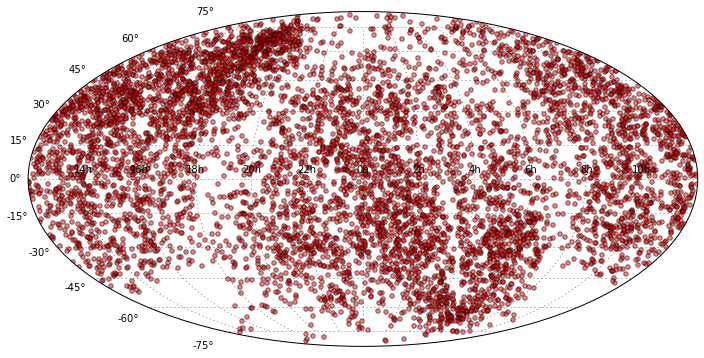

In [653]:
mpld3.disable_notebook()
import astropy.coordinates as coord
import astropy.units as u

ra = coord.Angle(rosat_r['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(rosat_r['dec']*u.degree)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian,c='red',alpha=0.5)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

In [62]:
rosat_r.to_csv('/Users/taweewat/Documents/xray_project/result/rosat-rad-v4.csv', index=False)

In [28]:
newfile = pd.read_csv('/Users/taweewat/Documents/xray_project/result/rosat-rad-v4.csv',\
                    keep_default_na=False, na_values=[""])
#newfile#[newfile['flag']==1]
newfile.shape

(9784, 15)

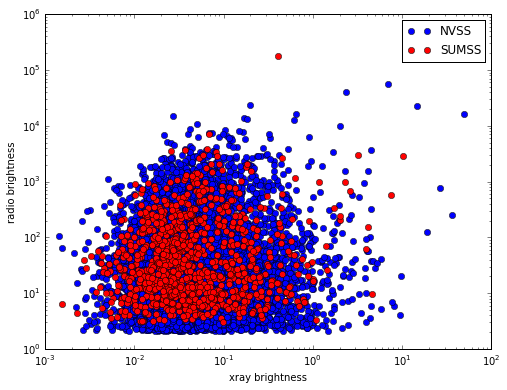

In [149]:
#xray_m = newfile['xc'].median(axis=0)
#radio_m = newfile['f_radio'].median(axis=0)
mpld3.disable_notebook()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(newfile[(newfile['flag']==1.0)]['xc'].values, newfile[(newfile['flag']==1.0)]['f_radio_n'].values, 'o',\
        alpha=1.0,label='NVSS')
ax.plot(newfile[(newfile['flag']==2.0)]['xc'].values, newfile[(newfile['flag']==2.0)]['f_radio_n'].values, 'o',\
        alpha=1.0,color='red', label='SUMSS')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('xray brightness')
ax.set_ylabel('radio brightness')
plt.legend(loc='best')

In [27]:
ra_n=(newfile['ra'].values+newfile['ra_radio'].values)/2.
dec_n=(newfile['dec'].values+newfile['dec_radio'].values)/2.

#ra_n=newfile['ra_radio'].values
#dec_n=newfile['dec_radio'].values

NameError: name 'newfile' is not defined

## create file for query

In [151]:
text_file = open("/Users/taweewat/Documents/xray_project/result/query-v5.txt", "w")
text_file.write("|         ra|       dec|\n")
text_file.write("|     double|    double|\n")
text_file.write("|           |          |\n")
text_file.write("|       null|      null|\n")
for i, item in enumerate(ra_n):
    text_file.write("%12f%+11.5f\n" % (ra_n[i], dec_n[i]))
text_file.close()

## WISE Catalog

In [23]:
header_row=['dist_w','ra0','dec0','ra_w', 'dec_w','w1','ew1','w2','ew2','w3','ew3','w4','ew4']
#n3 vs n4(mean position)
wi0 = pd.read_csv('/Users/taweewat/Documents/xray_project/wise_2mass/wise_n4.txt',\
                  names=header_row, sep=r"\s+", skiprows=26)

In [24]:
for i in header_row:
    wi0[i]=wi0[i].apply(func)

In [25]:
wi1=wi0.loc[:,('ra_w','dec_w','w1','ew1','dist_w','w2','ew2','w3','ew3','w4','ew4')]

In [29]:
fin=newfile.join(wi1)

In [31]:
newfile.shape, wi1.shape, fin.shape, wi1.dropna().shape

((9784, 15), (9784, 11), (9784, 26), (4789, 11))

In [158]:
fin.loc[8572,:]

ra           209.020830
dec          -34.345700
xc             0.062060
exc            0.017370
hr1            0.780000
ehr1           0.270000
hr2            0.540000
ehr2           0.300000
dec_radio    -34.352500
df_radio      25.400000
f_radio      843.200000
ra_radio     209.022333
f_radio_n    436.053723
flag           1.000000
dist           0.006964
ra_w         209.022489
dec_w        -34.352997
w1            13.227000
ew1            0.025000
dist_w        14.283856
w2            12.216000
ew2            0.023000
w3             8.982000
ew3            0.027000
w4             5.936000
ew4            0.040000
Name: 8572, dtype: float64

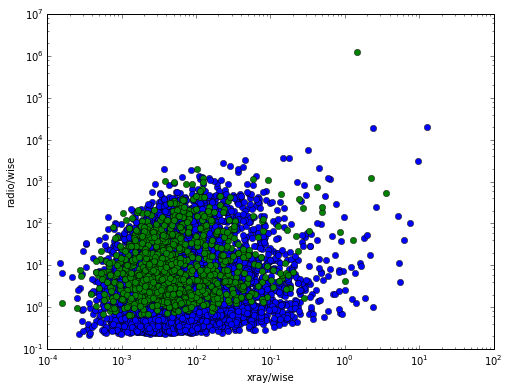

In [159]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(fin[(fin['flag']==1.0)]['xc'].values/fin[(fin['flag']==1.0)]['w4'].values,\
        fin[(fin['flag']==1.0)]['f_radio'].values/fin[(fin['flag']==1.0)]['w4'].values, 'o', alpha=1.0)
ax.plot(fin[(fin['flag']==2.0)]['xc'].values/fin[(fin['flag']==2.0)]['w4'].values,\
        fin[(fin['flag']==2.0)]['f_radio'].values/fin[(fin['flag']==2.0)]['w4'].values, 'o', alpha=1.0)
#ax.plot(newfile[(newfile['flag']==2.0)]['xc'].values, newfile[(newfile['flag']==2.0)]['f_radio'].values, 'o', alpha=1.0, color='red')
#ax.plot(newfile['xc'].ix[newfile['f_radio'].idxmax()], newfile['f_radio'].ix[newfile['f_radio'].idxmax()], 'o', color='red')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('xray/wise')
ax.set_ylabel('radio/wise')

## 2MASS Catalog

In [160]:
header_row=['dist_m','ra0','dec0','ra_m','dec_m','j_m','ej_m','h_m','eh_m','k_m','ek_m']
mass = pd.read_csv('/Users/taweewat/Documents/xray_project/wise_2mass/2mass_n5.txt', names=header_row, sep=r"\s+", skiprows=48)

In [161]:
for i in header_row:
    mass[i]=mass[i].apply(func)

In [162]:
mass

,dist_m,ra0,dec0,ra_m,dec_m,j_m,ej_m,h_m,eh_m,k_m,ek_m
0,9.712779,33.256858,84.33519,33.245905,84.337662,16.053,0.113,15.175,0.117,15.094,0.141
1,8.845190,65.185165,84.82340,65.181215,84.820969,13.541,0.025,13.154,0.032,13.123,0.033
2,15.492442,46.958144,82.46770,46.938930,82.464211,16.097,0.102,16.001,0.197,15.619,NaN
3,NaN,96.583066,84.29346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.574982,77.857021,83.47854,77.845022,83.474434,16.182,NaN,15.373,NaN,14.916,0.154
5,NaN,88.216313,81.69569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.667549,195.473702,85.12994,195.495455,85.130081,16.294,0.117,15.582,0.139,15.251,0.182
7,7.217989,195.912790,84.78185,195.903145,84.783653,15.902,0.113,14.157,NaN,13.631,NaN
8,3.206628,185.847274,84.60501,185.849701,84.604149,16.526,0.127,15.791,0.155,15.854,0.300
9,NaN,248.851213,82.89067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
mass1=mass.loc[:,('ra_m','dec_m','j_m','ej_m','dist_m','h_m','eh_m','k_m','ek_m')]

In [169]:
mass1.loc[8572,:]

ra_m      209.022252
dec_m     -34.353073
j_m        16.575000
ej_m        0.214000
dist_m     14.440759
h_m        14.555000
eh_m             NaN
k_m        14.809000
ek_m        0.160000
Name: 8572, dtype: float64

In [166]:
mass1.shape, fin.shape

((9784, 9), (9784, 26))

In [167]:
final=fin.join(mass1)

In [168]:
#Create a new file in result (the new catalog)
final.to_csv('/Users/taweewat/Documents/xray_project/result/rosat-rad-final3.csv', index=False)

## Start the Analysis

### Convert number to flux with physical units

- Rosat
-- http://www.xray.mpe.mpg.de/rosat/survey/rass-bsc/main/rass-bsc1-fmt.html

- WISE
-- http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html

In [9]:
final = pd.read_csv('/Users/taweewat/Documents/xray_project/result/rosat-rad-final3.csv',\
                    keep_default_na=False, na_values=[""])
print final.shape, final.dropna().shape

(9784, 35) (3528, 35)


In [10]:
alpha=-1.3
ratio=(1.4/0.843)**alpha
#final.columns
final['df_radio_n'] = final['df_radio']
final.loc[final['flag']==2,'df_radio_n'] = final.loc[final['flag']==2,'df_radio']*ratio

In [11]:
#Convert w1, ew1 to flux 
#convert Mab = Mvega+2.699 Jy, erg s-1 cm-2 Hz-1
final.loc[:,'wi_f']=3631.*1.0e-23*10.**(-(final.loc[:,'w4']+6.620)/2.5) # F0=3631 Jy, 
final.loc[:,'ewi_f']=3631.*1.0e-23*(10.**(-(final.loc[:,'w4']+final.loc[:,'ew4']+6.620)/2.5)-\
                                    10.**(-(final.loc[:,'w4']-final.loc[:,'ew4']+6.620)/2.5))/2.0  

#convert j_m, ej_m to flux, (J: F0=1594 Jy), (H: F0=1024 Jy), (K: F0=666.7) erg s-1 cm-2 Hz-1
final.loc[:,'2m_f']=666.7*1.0e-23*10.**(-(final.loc[:,'k_m'])/2.5)
final.loc[:,'e2m_f']=666.7*1.0e-23*(10.**(-(final.loc[:,'k_m']+final.loc[:,'ek_m'])/2.5)-\
                                    10.**(-(final.loc[:,'k_m']-final.loc[:,'ek_m'])/2.5))/2.0

#convert ROSAT to flux
#final.loc[:,'x_f']=final.loc[:,'xc']*5.6e-12/1.45e18 #(2.3 keV/h = 1.45e18 Hz)
final.loc[:,'x_f']=final.loc[:,'xc']*1.0e-11/5.56e17 #(2.3 keV/h = 5.56e17 Hz)
final.loc[:,'ex_f']=final.loc[:,'exc']*1.0e-11/5.56e17

#convert Radio data
final.loc[:,'rad_f']=final.loc[:,'f_radio_n']*1.0e-3*1.0e-23
final.loc[:,'erad_f']=final.loc[:,'df_radio_n']*1.0e-3*1.0e-23

In [12]:
#final.loc[:,('w4','ew4','k_m','ek_m','f_radio_n','df_radio_n','flag','xc','exc')]
final.loc[:,('wi_f','ewi_f','2m_f','e2m_f','x_f','ex_f','rad_f','erad_f')]

,wi_f,ewi_f,2m_f,e2m_f,x_f,ex_f,rad_f,erad_f
0,2.674399e-26,-8.125529e-27,6.114071e-27,-7.962424e-28,1.863309e-31,8.643885e-32,5.710000e-25,1.800000e-26
1,2.200018e-26,NaN,3.756042e-26,-1.141792e-27,2.899281e-31,1.183094e-31,3.630000e-25,1.200000e-26
2,2.145983e-26,-7.350968e-27,3.769905e-27,NaN,2.293165e-31,1.091906e-31,9.060000e-25,3.200000e-26
3,1.139794e-25,-9.458923e-27,NaN,NaN,6.214029e-31,1.684353e-31,1.169000e-24,3.500000e-26
4,1.516444e-26,NaN,7.203283e-27,-1.025137e-27,2.341727e-31,1.041007e-31,2.400000e-25,1.100000e-26
5,NaN,NaN,NaN,NaN,2.766187e-31,1.342626e-31,6.800000e-26,5.000000e-27
6,2.202045e-26,NaN,5.290911e-27,-8.910653e-28,5.098921e-31,1.345683e-31,3.200000e-26,5.000000e-27
7,1.351532e-26,NaN,2.352504e-26,NaN,8.865108e-31,1.897482e-31,1.720000e-25,1.300000e-26
8,7.066856e-26,-7.499141e-27,3.036201e-27,-8.496491e-28,2.474820e-31,1.321043e-31,2.797000e-24,9.300000e-26
9,1.838342e-26,NaN,NaN,NaN,1.751259e-31,6.681655e-32,2.320000e-25,1.400000e-26


In [13]:
final['xray']=np.log10(final['x_f'].values)-np.log10(final['2m_f'].values)
final['mir']=np.log10(final['wi_f'].values)-np.log10(final['2m_f'].values)
final['radio']=np.log10(final['rad_f'].values)-np.log10(final['2m_f'].values)

final['exray']=((0.434*final['ex_f']/final['x_f'])**2+(0.434*final['e2m_f']/final['2m_f'])**2)**0.5
final['emir']=((0.434*final['ewi_f']/final['wi_f'])**2+(0.434*final['e2m_f']/final['2m_f'])**2)**0.5
final['eradio']=((0.434*final['erad_f']/final['rad_f'])**2+(0.434*final['e2m_f']/final['2m_f'])**2)**0.5

In [14]:
final.loc[0:10,('xray','exray','mir','emir','radio','eradio')]

,xray,exray,mir,emir,radio,eradio
0,-4.516045,0.209116,0.640896,0.143463,1.970306,0.058153
1,-5.112440,0.177591,-0.232304,NaN,0.985176,0.019491
2,-4.215895,NaN,0.755296,NaN,2.380798,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,-4.487994,0.202579,0.323296,NaN,1.522681,0.064889
5,NaN,NaN,NaN,NaN,NaN,NaN
6,-4.016052,0.135874,0.619296,NaN,0.781620,0.099704
7,-4.423846,NaN,-0.240704,NaN,0.863998,NaN
8,-4.088787,0.261571,1.366896,0.129889,2.964362,0.122305
9,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Brightness Cutoff for k_m > 9 mag
final=final[final['k_m']>9.]
final=final[final['dist'].values*3600.<20.0]
final.shape

(4595, 50)

In [16]:
final.loc[(final['xray']<-5.05) & (final['xray']>-5.06),('x_f','rad_f','wi_f','2m_f','hr1','xray','mir','radio')]

,x_f,rad_f,wi_f,2m_f,hr1,xray,mir,radio
3893,8.269784e-31,1.070000e-25,2.769659e-26,9.452147e-26,0.97,-5.058036,-0.533104,0.053853
4585,1.305216e-30,3.620000e-25,4.157442e-26,1.466663e-25,1.00,-5.050648,-0.547504,0.392378


### Objects
* Abell 1835: 14h1m02.3s +02d52m48s
* NGC 1275: 03h19m48.1s +41d30m42s
* Pheonix: 23h44m42.2s −42d43m08s

New location (from Mike)
* Abell 1835: 210.258631, 2.878468
* Pheonix: 356.18307, -42.720204

In [17]:
print (((final.loc[:,'ra']-210.258631)**2+(final.loc[:,'dec']-2.878468)**2)**0.5)[(((final.loc[:,'ra']-210.258631)**2+(final.loc[:,'dec']-2.878468)**2)**0.5).idxmin()]*3600.
print (((final.loc[:,'ra']-49.950416)**2+(final.loc[:,'dec']-41.51166)**2)**0.5)[(((final.loc[:,'ra']-49.950416)**2+(final.loc[:,'dec']-41.51166)**2)**0.5).idxmin()]*3600
print (((final.loc[:,'ra']-356.18307)**2+(final.loc[:,'dec']+42.720204)**2)**0.5)[(((final.loc[:,'ra']-356.18307)**2+(final.loc[:,'dec']+42.720204)**2)**0.5).idxmin()]*3600

7.04252846639
14.5286455583
7.18357967587


In [18]:
abell2=final.loc[(((final.loc[:,'ra']-210.258631)**2+(final.loc[:,'dec']-2.878468)**2)**0.5).idxmin(),:]
ngc=final.loc[(((final.loc[:,'ra']-49.950416)**2+(final.loc[:,'dec']-41.51166)**2)**0.5).idxmin(),:]
pheo2=final.loc[(((final.loc[:,'ra']-356.18307)**2+(final.loc[:,'dec']+42.720204)**2)**0.5).idxmin(),:]

In [19]:
print deg_hr(abell2['ra'], abell2['dec']), abell2['flag']
print deg_hr(ngc['ra'], ngc['dec']), ngc['flag']
print deg_hr(pheo2['ra'], pheo2['dec']), pheo2['flag']

14h1m2.10s +2d52m49.51s 1.0
3h19m47.40s +41d30m52.02s 1.0
23h44m44.10s -42d43m19.49s 2.0


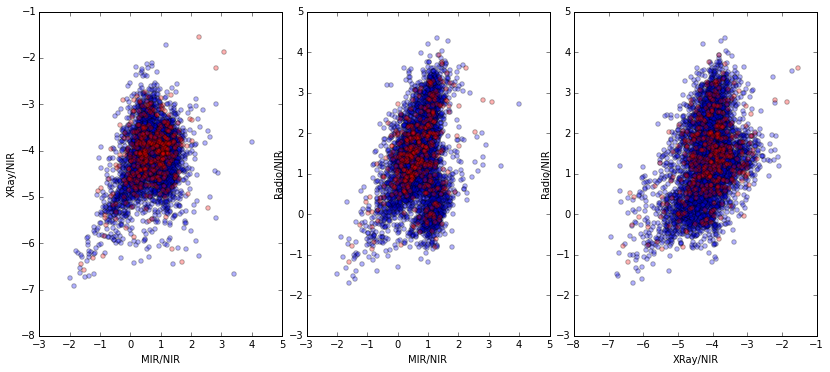

In [20]:
#mpld3.enable_notebook()
mpld3.disable_notebook()

fig, ax = plt.subplots(1, 3, figsize=(12,6))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

mir=final[final['flag']==1.0]['mir'].values
xray=final[final['flag']==1.0]['xray'].values
radio=final[final['flag']==1.0]['radio'].values
mir2=final[final['flag']==2.0]['mir'].values
xray2=final[final['flag']==2.0]['xray'].values
radio2=final[final['flag']==2.0]['radio'].values

point=ax[0].scatter(mir,xray,alpha=0.3)
ax[0].scatter(mir2,xray2,alpha=0.3,c='red')
ax[0].set_xlabel('MIR/NIR')
ax[0].set_ylabel('XRay/NIR')
#ax[0].legend(loc='best')

point=ax[1].scatter(mir,radio,alpha=0.3)
ax[1].scatter(mir2,radio2,alpha=0.3,c='red')
ax[1].set_xlabel('MIR/NIR')
ax[1].set_ylabel('Radio/NIR')

point=ax[2].scatter(xray,radio,alpha=0.3)
ax[2].scatter(xray2,radio2,alpha=0.3,c='red')
ax[2].set_xlabel('XRay/NIR')
ax[2].set_ylabel('Radio/NIR')

plugins.connect(fig, plugins.LinkedBrush(point))

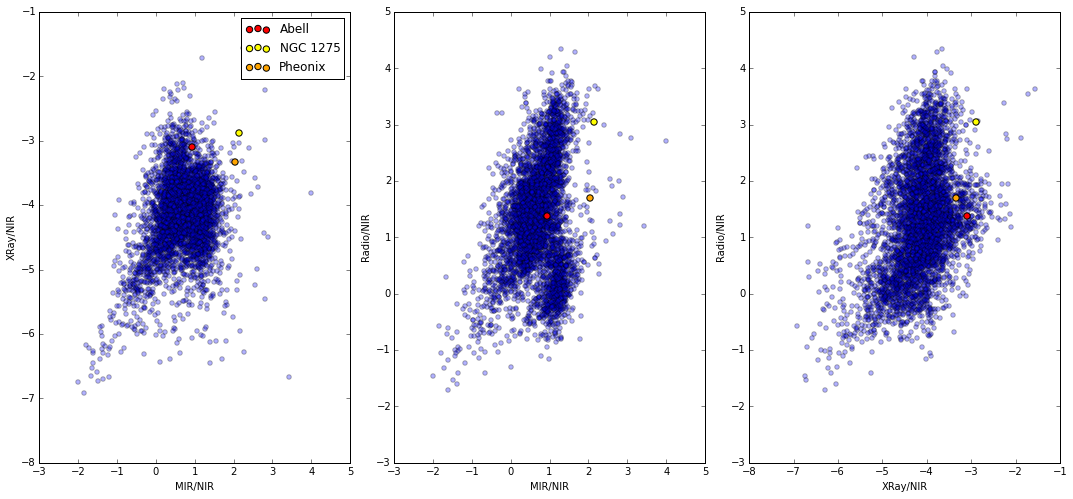

In [22]:
#mpld3.enable_notebook()
mpld3.disable_notebook()

fig, ax = plt.subplots(1, 3, figsize=(15,7))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

mir=final['mir'].values
xray=final['xray'].values
radio=final['radio'].values

point=ax[0].scatter(mir,xray,alpha=0.3)
ax[0].scatter(abell2['mir'],abell2['xray'],alpha=1.0,c='red',label='Abell',s=40.0)
ax[0].scatter(ngc['mir'],ngc['xray'],alpha=1.0,c='yellow',label='NGC 1275',s=40.0)
ax[0].scatter(pheo2['mir'],pheo2['xray'],alpha=1.0,c='orange',label='Pheonix',s=40.0)
ax[0].set_xlabel('MIR/NIR')
ax[0].set_ylabel('XRay/NIR')
ax[0].legend(loc='best')

point=ax[1].scatter(mir,radio,alpha=0.3)
ax[1].scatter(abell2['mir'],abell2['radio'],alpha=1.0,c='red',label='Abell',s=40.0)
ax[1].scatter(ngc['mir'],ngc['radio'],alpha=1.0,c='yellow',label='NGC 1275',s=40.0)
ax[1].scatter(pheo2['mir'],pheo2['radio'],alpha=1.0,c='orange',label='Pheonix',s=40.0)
ax[1].set_xlabel('MIR/NIR')
ax[1].set_ylabel('Radio/NIR')

point=ax[2].scatter(xray,radio,alpha=0.3)
ax[2].scatter(abell2['xray'],abell2['radio'],alpha=1.0,c='red',label='Abell',s=40.0)
ax[2].scatter(ngc['xray'],ngc['radio'],alpha=1.0,c='yellow',label='NGC 1275',s=40.0)
ax[2].scatter(pheo2['xray'],pheo2['radio'],alpha=1.0,c='orange',label='Pheonix',s=40.0)
ax[2].set_xlabel('XRay/NIR')
ax[2].set_ylabel('Radio/NIR')


plt.tight_layout()
plugins.connect(fig, plugins.LinkedBrush(point))

In [ ]:
mpld3.disable_notebook()
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
x1=final['x_f'].values/final['2m_f'].values
y1=final['rad_f'].values/final['2m_f'].values

#x1=np.log(final['wi_f'].values/final['2m_f'].values)
#y1=np.log(final['rad_f'].values/final['2m_f'].values)

scatter=ax.scatter(x1,y1,alpha=0.5)
ax.set_xlabel('X-ray/NIR')
ax.set_ylabel('Radio/NIR')
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([1e-8,1e-1,1e5,1e-1])

labels = ['RA={0}, Dec={1}'.format(i, j) for i, j in zip(final['ra'].values, final['dec'].values)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

Abell-1835
<img src="../img/abell1835.png" width="700" height="128">
NGC-1235
<img src="../img/ngc1235.png" width="700" height="128">
Phenoix
<img src="../img/pheonix.png" width="700" height="128">

### Interesting object (Artifact)
* very brigt in 2MASS (Near IR)
* bright in WISE (Mid IR)
* equally bright in XRay and Radio
<img src="../img/01.png" width="128" height="128"><img src="../img/02.png" width="128" height="128">

In [17]:
print deg_hr(81.26167, -69.64458)
print deg_hr(89.94376, -50.44458)
print deg_hr(169.78375, 21.32083)
print final.loc[(final['dec']<=21.32083) & (final['dec']>=21.3208),('ra','dec')]

5h25m2.80s -69d38m40.49s
5h59m46.50s -50d26m40.49s
11h19m8.10s +21d19m14.99s
             ra       dec
5620  169.78375  21.32083


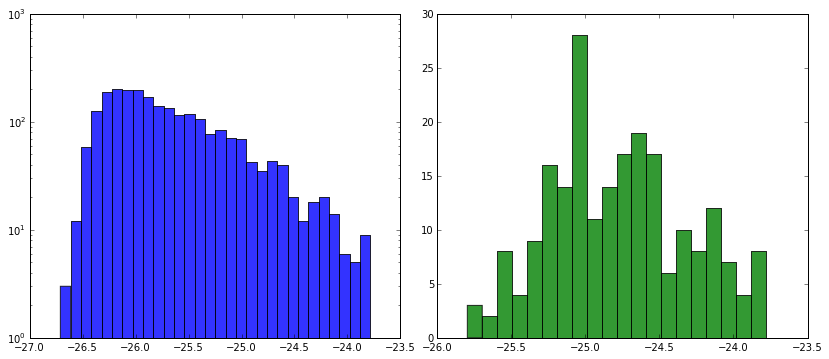

In [18]:
mpld3.disable_notebook()
fig, ax = plt.subplots(1, 2, figsize=(12,6))#, sharex="col", sharey="row", figsize=(12, 6))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

x='2m_f'
ax[0].hist(np.log10(final.loc[:,(x)].values),bins=30, alpha=0.8, color='blue', label='MIR')
ax[1].hist(np.log10(final.loc[final['xray']<-5,(x)].values),bins=20, alpha=0.8, color='green', label='XRay')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')
#plt.hist(radio,bins=50, alpha=0.8, color='red', label='Radio')
#plt.legend(loc='best')

mpld3.disable_notebook()
#plt.hist(final['hr1'],bins=50, alpha=0.8, color='blue')
x='2m_f'
y='wi_f'
plt.plot(final.loc[:,(x)],final.loc[:,(y)],'o')
plt.plot(final.loc[final['xray']<-7.,(x)],final.loc[final['xray']<-7.,(y)],'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(x)
plt.ylabel(y)
#plt.axis([0,100,-2,2])
#final.loc[final['xray']<-7.,'hr1']

final.loc[final['xray']<-7.,('xc','f_radio','ra','ra_w','ra_m','ra_radio','dec')]

plt.plot(np.log(final['wi_f'].values), np.log(final['2m_f'].values), '.', alpha=0.5)
#plt.plot(np.log(final['jm_c'].values), '.', alpha=0.5)

#print final[final['flag']==1.0].shape
#labels = ['point {0}'.format(i + 1) for i in range(4073)]
#tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
#mpld3.plugins.connect(fig, tooltip)
#print labels

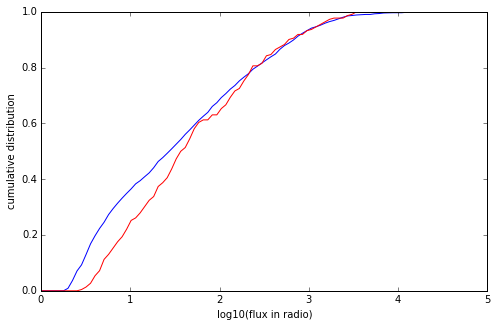

In [24]:
mpld3.disable_notebook()
bins = np.linspace(0, 5, 100)
values, bases = np.histogram(np.log10(final[final['flag']==1.0]['f_radio_n'].values), bins=bins)
values2, base = np.histogram(np.log10(final[final['flag']==2.0]['f_radio_n'].values), bins=bins)
cumulative = np.cumsum(values)
cumulative2 = np.cumsum(values2)

plt.plot(bins[:-1], np.array(cumulative)/float(len(final[final['flag']==1.0]['f_radio_n'].values)), c='blue')
plt.plot(bins[:-1], np.array(cumulative2)/float(len(final[final['flag']==2.0]['f_radio_n'].values)), c='red')
plt.xlabel('log10(flux in radio)')
plt.ylabel('cumulative distribution')
#print np.mean(values)

/Users/taweewat/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:213: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/taweewat/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:249: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


(array([  13.,   51.,  110.,  112.,  145.,  164.,  158.,  191.,  146.,
         180.,  155.,  124.,  141.,  110.,  115.,  110.,   94.,   71.,
          77.,   63.]),
 array([  0.08881441,   1.08419546,   2.07957651,   3.07495756,
          4.07033861,   5.06571966,   6.0611007 ,   7.05648175,
          8.0518628 ,   9.04724385,  10.0426249 ,  11.03800595,
         12.03338699,  13.02876804,  14.02414909,  15.01953014,
         16.01491119,  17.01029224,  18.00567329,  19.00105433,  19.99643538]),
 <a list of 20 Patch objects>)

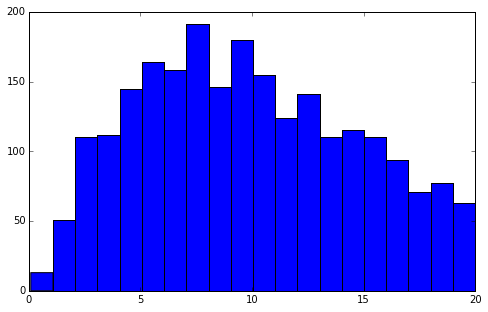

In [35]:
plt.hist(final['dist'].values*3600., bins=20.)

NameError: name 'mir' is not defined

/Users/taweewat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


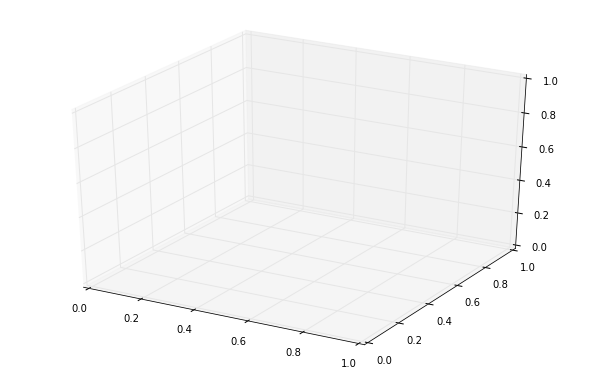

In [4]:
mpld3.disable_notebook()

from matplotlib import pyplot
import pylab
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pylab.figure()
ax = Axes3D(fig)

x = mir
y = radio
z = xray

ax.scatter(x, y, z, alpha=0.1)
ax.set_xlabel('MIR/NIR')
ax.set_ylabel('Radio/NIR')
ax.set_zlabel('Xray/NIR')

ax.scatter(abell2['mir'],abell2['radio'],abell2['xray'],alpha=1.0,c='red',label='Abell',s=40.0)
ax.scatter(ngc['mir'],ngc['radio'],ngc['xray'],alpha=1.0,c='yellow',label='Abell',s=40.0)
ax.scatter(pheo2['mir'],pheo2['radio'],pheo2['xray'],alpha=1.0,c='orange',label='Abell',s=40.0)

#ax.view_init(elev=50., azim=50)
#for ii in xrange(0,360,1):
#    ax.view_init(elev=10., azim=ii)
#    savefig("movie"%ii+".png")

In [39]:
import plotly.plotly as py
from plotly.graph_objs import *

In [86]:
trace0 = Scatter3d(
    x=mir,  # x coords
    y=radio,  # y coords
    z=xray,  # z coords
    mode='markers',
    marker=Marker(color='blue',symbol='dot',size=2,opacity=0.3)
)

trace1 = Scatter3d(
    x=abell2['mir'],  # x coords
    y=abell2['radio'],  # y coords
    z=abell2['xray'],  # z coords
    mode='markers',
    name='Abell',
    marker=Marker(color='red',symbol='dot',size=4,opacity=1.0)
)

trace2 = Scatter3d(
    x=ngc['mir'],  # x coords
    y=ngc['radio'],  # y coords
    z=ngc['xray'],  # z coords
    mode='markers',
    name='NGC',
    marker=Marker(color='green',symbol='dot',size=4,opacity=1.0)
)

trace3 = Scatter3d(
    x=pheo2['mir'],  # x coords
    y=pheo2['radio'],  # y coords
    z=pheo2['xray'],  # z coords
    mode='markers',
    name='Pheonix',
    marker=Marker(color='orange',symbol='dot',size=4,opacity=1.0)
)

trace4 = Scatter3d(
    x=cut['mir'],  # x coords
    y=cut['radio'],  # y coords
    z=cut['xray'],  # z coords
    mode='markers',
    name='Cut',
    marker=Marker(color='green',symbol='cross',size=5,opacity=0.8)
)

layout = Layout(
    title='Plot of Xray, MIR, Radio',
    scene=Scene(
        xaxis=XAxis(title='MIR/NIR'),
        yaxis=YAxis(title='Radio/NIR'),
        zaxis=ZAxis(title='Xray/NIR')
    )
)

# Package the trace dictionary into a data object
data = Data([trace0,trace1,trace2,trace3,trace4])

fig = Figure(data=data, layout=layout)
py.iplot(fig)

## Start making Cuts for interesting objects
* this section has been moved to the other file ``02_find_object`` for clarity and seperation between combining objects and doing analysis

In [82]:
#Method 2: ellipsoid 

def hfactor(x,y,z,rx,ry,rz):
    return ((rx*ry*rz)**2./((x*ry*rz)**2.+(y*rx*rz)**2.+(z*rx*ry)**2.))**0.5

def inellips_v2(x):
    rx=1.079#0.954
    ry=1.079#0.954
    rz=0.602#0.477
    x0=x['mir']
    y0=x['radio']
    z0=x['xray']
    ex=x['emir']
    ey=x['eradio']
    ez=x['exray']
        
    h=hfactor(x0-pheo2['mir'],y0-pheo2['radio'],z0-pheo2['xray'],rx,ry,rz)
    dh=hfactor(x0-pheo2['mir'],y0-pheo2['radio'],z0-pheo2['xray'],ex,ey,ez)

    #print r, dr, h, dh
    if h+dh > 1.0:
        return h+dh
    else:
        return np.nan

    
#inellips_v2(final.loc[10])
cut1=final
cut1['inside']=final.apply(inellips_v2, axis=1)
cut=cut1.dropna()
cut.shape

(97, 51)

In [83]:
#Method 1: Cube uncertainty

#factor of 4 and 12, 12 respectively
ls=[]
for i in [-1.,0.,1.]:
    for j in [-1.,0.,1.]:
        for k in [-1.,0.,1.]:
            ls.append([i,j,k])

def inside(x,y,z,rx,ry,rz):
    return (x-pheo2['mir'])**2/rx**2+(y-pheo2['radio'])**2/ry**2+(z-pheo2['xray'])**2/rz**2

def inellips(x):
    rx=1.079
    ry=1.079
    rz=0.602
    x0=x['mir']
    y0=x['radio']
    z0=x['xray']
    ex=x['emir']
    ey=x['eradio']
    ez=x['exray']
    
    rs=[]
    for i in ls:
        r=inside(x0+ex*i[0],y0+ey*i[1],z0+ez*i[2],rx,ry,rz)
        if r <= 1.0:
            rs.append(r)
        else:
            pass

    if len(rs) >= 1:
        return len(rs)
    else:
        return np.nan

cut1=final
cut1['inside']=final.apply(inellips, axis=1)
cut=cut1.dropna()
cut.shape

(142, 51)

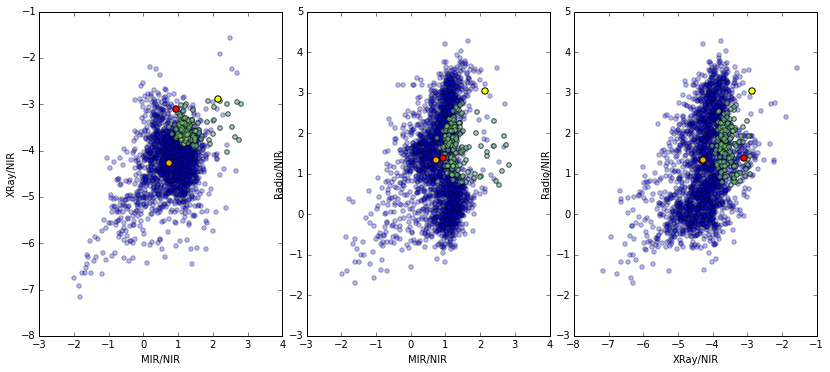

In [87]:
#mpld3.enable_notebook()
mpld3.disable_notebook()

fig, ax = plt.subplots(1, 3, figsize=(12,6))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

mir=final['mir'].values
xray=final['xray'].values
radio=final['radio'].values

point=ax[0].scatter(mir,xray,alpha=0.3)
ax[0].scatter(cut['mir'],cut['xray'],alpha=0.5,c='lightgreen',label='Cut')
ax[0].scatter(abell2['mir'],abell2['xray'],alpha=1.0,c='red',label='Abell',s=40.0)
ax[0].scatter(ngc['mir'],ngc['xray'],alpha=1.0,c='yellow',label='NGC 1275',s=40.0)
ax[0].scatter(pheo2['mir'],pheo2['xray'],alpha=1.0,c='orange',label='Pheonix',s=40.0)
ax[0].set_xlabel('MIR/NIR')
ax[0].set_ylabel('XRay/NIR')
#ax[0].legend(loc='best')

point=ax[1].scatter(mir,radio,alpha=0.3)
ax[1].scatter(cut['mir'],cut['radio'],alpha=0.5,c='lightgreen',label='Cut')
ax[1].scatter(abell2['mir'],abell2['radio'],alpha=1.0,c='red',label='Abell',s=40.0)
ax[1].scatter(ngc['mir'],ngc['radio'],alpha=1.0,c='yellow',label='NGC 1275',s=40.0)
ax[1].scatter(pheo2['mir'],pheo2['radio'],alpha=1.0,c='orange',label='Pheonix',s=40.0)
ax[1].set_xlabel('MIR/NIR')
ax[1].set_ylabel('Radio/NIR')

point=ax[2].scatter(xray,radio,alpha=0.3)
ax[2].scatter(cut['xray'],cut['radio'],alpha=0.5,c='lightgreen',label='Cut')
ax[2].scatter(abell2['xray'],abell2['radio'],alpha=1.0,c='red',label='Abell',s=40.0)
ax[2].scatter(ngc['xray'],ngc['radio'],alpha=1.0,c='yellow',label='NGC 1275',s=40.0)
ax[2].scatter(pheo2['xray'],pheo2['radio'],alpha=1.0,c='orange',label='Pheonix',s=40.0)
ax[2].set_xlabel('XRay/NIR')
ax[2].set_ylabel('Radio/NIR')

plugins.connect(fig, plugins.LinkedBrush(point))

In [96]:
#209.02268 -34.35293
pheo2=final.loc[(((final.loc[:,'ra']-209.02268)**2+(final.loc[:,'dec']+34.35293)**2)**0.5).idxmin(),:]
print (((su01.loc[:,'ra']-209.02268)**2+(newfile.loc[:,'dec']+34.35293)**2)**0.5)[(((newfile.loc[:,'ra']-209.02268)**2+(newfile.loc[:,'dec']+34.35293)**2)**0.5).idxmin()]*3600

8985.84202845


In [99]:
deg_hr(209.02268, -34.35293)

'13h56m5.44s -34d21m10.55s'

In [70]:
trace0 = Scatter3d(
    x=mir,  # x coords
    y=radio,  # y coords
    z=xray,  # z coords
    mode='markers',
    marker=Marker(color='blue',symbol='dot',size=2,opacity=0.3)
)

def ellipse(u,v):
    x=pheo2['mir']+1.079*np.cos(u)*np.cos(v)
    y=pheo2['radio']+1.079*np.cos(u)*np.sin(v)
    z=pheo2['xray']+0.602*np.sin(u)
    return x,y,z

u=np.linspace(-np.pi/2,np.pi/2,200)
v=np.linspace(-np.pi,np.pi,200)
ugrid, vgrid = np.meshgrid(u,v)

x,y,z=ellipse(ugrid, vgrid)

#surface = Surface(x=x, y=y, z=z,opacity=0.8)
surface = Surface(x=x, y=y, z=z,opacity=0.8,showscale=False)#,colorscale='Greys')#,\
                 #contours=dict(x=dict(show=True, width=1),\
                 #              y=dict(show=True, width=1),\
                 #              z=dict(show=True, width=1)))

trace1 = Scatter3d(
    x=abell2['mir'],  # x coords
    y=abell2['radio'],  # y coords
    z=abell2['xray'],  # z coords
    mode='markers',
    name='Abell',
    marker=Marker(color='red',symbol='dot',size=5,opacity=1.0)
)

trace2 = Scatter3d(
    x=ngc['mir'],  # x coords
    y=ngc['radio'],  # y coords
    z=ngc['xray'],  # z coords
    mode='markers',
    name='NGC',
    marker=Marker(color='green',symbol='dot',size=5,opacity=1.0)
)

trace3 = Scatter3d(
    x=pheo2['mir'],  # x coords
    y=pheo2['radio'],  # y coords
    z=pheo2['xray'],  # z coords
    mode='markers',
    name='Pheonix',
    marker=Marker(color='orange',symbol='dot',size=5,opacity=1.0)
)

trace4 = Scatter3d(
    x=cut['mir'],  # x coords
    y=cut['radio'],  # y coords
    z=cut['xray'],  # z coords
    mode='markers',
    name='Cut',
    marker=Marker(color=cut['inside'],symbol='diamond',size=4,opacity=0.8,\
                  colorscale='Reds',showscale=True,cmax=cut['inside'].max())
)


layout = Layout(
    title='Plot of Xray, MIR, Radio',
    scene=Scene(
        xaxis=XAxis(title='MIR/NIR'),
        yaxis=YAxis(title='Radio/NIR'),
        zaxis=ZAxis(title='Xray/NIR')))

# Package the trace dictionary into a data object
data = Data([trace0,trace1,trace2,trace3,trace4,surface])

fig = Figure(data=data, layout=layout)
py.iplot(fig)

KeyError: 'mir'

In [66]:
xt='mir'
yt='radio'
ext='emir'
eyt='eradio'

trace3 = Scatter(
    x=pheo2[xt],  # x coords
    y=pheo2[yt],  # y coords
    mode='markers',
    name='Pheonix',
    marker=Marker(color='blue',symbol='dot',size=12,opacity=1.0)
)

trace4 = Scatter(
    x=cut[xt],  # x coords
    y=cut[yt],  # y coords
    #z=cut['xray'],  # z coords
    mode='markers',
    name='Cut',
    marker=Marker(color=cut['inside'],symbol='diamond',size=8,opacity=0.8,\
                  colorscale='Reds',showscale=True,cmax=cut['inside'].max()),
    error_x=dict(type='data',array=cut[ext],symmetric=True),
    error_y=dict(type='data',array=cut[eyt],symmetric=True)
)


layout = Layout(
    title='Plot of MIR, Radio',
   #shapes=dict(type='circle',xref='x',yref='y',opacity=0.3,x0=0,y0=0,\
    #           x1=2,y1=2),
    scene=Scene(
        xaxis=XAxis(title='MIR/NIR'),
        yaxis=YAxis(title='Radio/NIR'))
)

layout = {
    'shapes': [
        {
            'opacity': 0.3,
            'xref': 'x',
            'yref': 'y',
            'fillcolor': 'lime',
            'x0': pheo2[xt]-1.079,
            'y0': pheo2[yt]-1.079,
            'x1': pheo2[xt]+1.079,
            'y1': pheo2[yt]+1.079,
            'type': 'circle',
            'line': {
                'color': 'lime',
            },
        }]
}

# Package the trace dictionary into a data object
data = Data([trace3,trace4])

fig = Figure(data=data, layout=layout)
py.iplot(fig)